# BootCamp 2019 - Week 1

## Numerical Differentiation

Author: Martina Fraschini

In [1]:
# import packages
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt

### Problem 1

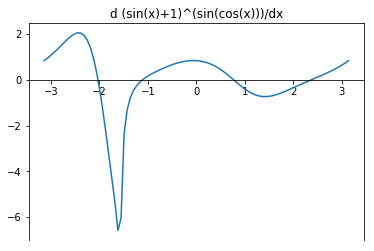

In [2]:
# calculate the symbolic derivative
x = sy.symbols('x')
symbder = sy.diff((sy.sin(x)+1)**(sy.sin(sy.cos(x))), x)
df = sy.lambdify(x, symbder, "numpy")

# plot
myx = np.linspace(-np.pi,np.pi,100)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(myx, df(myx))
plt.title(r"d (sin(x)+1)^(sin(cos(x)))/dx")
plt.show()

### Problem 2

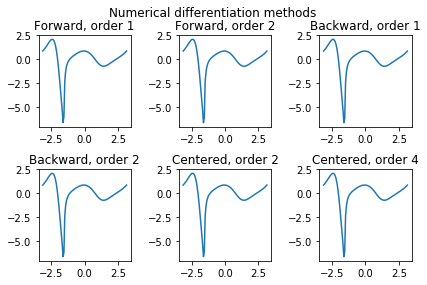

In [3]:
# import package
import numpy as np
from matplotlib import pyplot as plt

# define function forward of order 1
def forward1(f, x, h):
    return (f(x+h)-f(x))/h

# define function forward of order 2
def forward2(f, x, h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

# define function backward of order 1
def backward1(f, x, h):
    return (f(x)-f(x-h))/h

# define function backward of order 2
def backward2(f, x, h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

# define function centered of order 2
def centered2(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

# define function centered of order 4
def centered4(f, x, h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

# define function to differentiate
myf = lambda x: (np.sin(x)+1)**(np.sin(np.cos(x)))
myx = np.linspace(-np.pi,np.pi,100)
myh = .001

# plot the results
fig, ax = plt.subplots(2,3)
ax[0,0].plot(myx, forward1(myf, myx, myh))
ax[0,0].set_title("Forward, order 1")
ax[0,1].plot(myx, forward2(myf, myx, myh))
ax[0,1].set_title("Forward, order 2")
ax[0,2].plot(myx, backward1(myf, myx, myh))
ax[0,2].set_title("Backward, order 1")
ax[1,0].plot(myx, backward1(myf, myx, myh))
ax[1,0].set_title("Backward, order 2")
ax[1,1].plot(myx, centered2(myf, myx, myh))
ax[1,1].set_title("Centered, order 2")
ax[1,2].plot(myx, centered4(myf, myx, myh))
ax[1,2].set_title("Centered, order 4")
fig.tight_layout()
fig.suptitle("Numerical differentiation methods")
fig.subplots_adjust(top=0.88)
plt.show()

### Problem 3

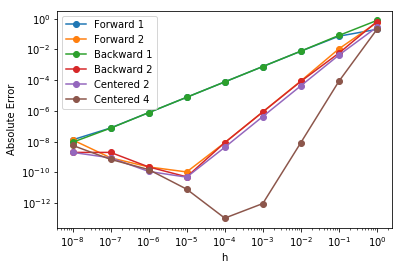

In [4]:
# since I'm using Jupyter Notebook and Problem 1 and 2 have already been run,
# I don't re-define all the functions.
# I you want to run only this part, you'll need Problem 1 and 2 before.

mypoint = 1
rightf = df(mypoint)
allh = np.logspace(-8, 0, 9)
errf1 = np.zeros(len(allh))
errf2 = np.zeros(len(allh))
errb1 = np.zeros(len(allh))
errb2 = np.zeros(len(allh))
errc2 = np.zeros(len(allh))
errc4 = np.zeros(len(allh))
# compute the errors
for i in range(len(allh)):
    errf1[i] = abs(forward1(myf, mypoint, allh[i]) - rightf)
    errf2[i] = abs(forward2(myf, mypoint, allh[i]) - rightf)
    errb1[i] = abs(backward1(myf, mypoint, allh[i]) - rightf)
    errb2[i] = abs(backward2(myf, mypoint, allh[i]) - rightf)
    errc2[i] = abs(centered2(myf, mypoint, allh[i]) - rightf)
    errc4[i] = abs(centered4(myf, mypoint, allh[i]) - rightf)

# plot the errors
plt.loglog(allh, errf1, 'o-', label="Forward 1")
plt.loglog(allh, errf2, 'o-', label="Forward 2")
plt.loglog(allh, errb1, 'o-', label="Backward 1")
plt.loglog(allh, errb2, 'o-', label="Backward 2")
plt.loglog(allh, errc2, 'o-', label="Centered 2")
plt.loglog(allh, errc4, 'o-', label="Centered 4")
plt.xlabel("h")
plt.ylabel("Absolute Error")
plt.legend()
plt.show()

### Problem 5

In [5]:
# define function for Jacobian
def myJacobian(f, x0, h):
    dim_r = len(f)
    dim_c = len(x0)
    I = np.eye(dim_c)
    J = np.zeros((dim_r,dim_c))
    for r in range(dim_r):
        for c in range(dim_c):
            J[r,c] = (f[r](x0+h*I[:,c]) - f[r](x0-h*I[:,c]))/(2*h)
    return J

# demo for the function
f = [lambda x: x[0]**2, lambda x: x[0]**3-x[1]]
x = np.array([2,3])
h = .0001
Jacobian = myJacobian(f,x,h)
print(Jacobian)

[[ 4.          0.        ]
 [12.00000001 -1.        ]]


### Problem 6

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


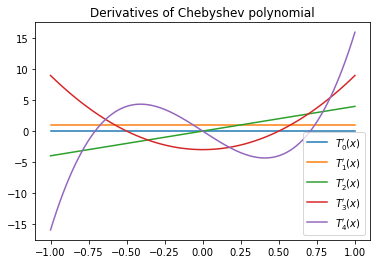

In [6]:
# import packages
from autograd import numpy as anp
from autograd import elementwise_grad

# define function to construct Chebyshev polynomial recursively
def Chebyshev(x, n):
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2*x*Chebyshev(x,n-1) - Chebyshev(x,n-2)

# define function and gradient
f = lambda x,n: Chebyshev(x,n)
df = elementwise_grad(f)

# plot
x = np.linspace(-1,1,100)
for i in range(5):
    plt.plot(x, df(x,i), label=r"$T_{}'(x)$".format(i))
plt.legend()
plt.title("Derivatives of Chebyshev polynomial")
plt.show()